In [1]:
import os
import sys
import math
import time
import glob
import scipy
import shutil
import warnings
import statistics

import numpy as np
import pandas as pd

import pyvista as pv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.tri as tri

from scipy import stats, spatial
from scipy.stats import linregress
from scipy.interpolate import griddata
from scipy.interpolate import splprep, splev

# local modules
sys.path.append((os.path.abspath(r"E:\em2er\SD wERI Workflows and Data")))
import testcalib_CT as testcalib
import em2er

sys.path.append((os.path.abspath(r"E:\em2er\SD wERI Workflows and Data\resipy-3.6.4\src")))
from resipy import Project, Survey

API path =  E:\em2er\SD wERI Workflows and Data\resipy-3.6.4\src\resipy
ResIPy version =  3.6.4
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
# Define path to working directory
dRef = r"E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_inversion_files\inv_files"

# Define working directory, list of surveys, and electrode positions
data_folder =  r"E:\em2er\SD wERI Workflows and Data\Electrode mapping from Boat GPS\ERT Survey Files"
refPath = glob.glob(os.path.join(data_folder, "*"))

electrode_folder =  r"E:\em2er\SD wERI Workflows and Data\Electrode mapping from Boat GPS\ERT Electrode Files"
electrode_list = glob.glob(os.path.join(electrode_folder, "*"))

survey_list = []
results_list = []
rms_list = []

In [3]:
for i in range(len(refPath)):
    print('---------------------------------------------------------------------------------------------------------')
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('STARTING SURVEY', str(i))
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('---------------------------------------------------------------------------------------------------------')
    
    print(f'The length of refPath is {len(refPath)}')
    k = Project(typ = 'R2', dirname = dRef + str(i))
    k.createSurvey(refPath[i], ftype = 'Syscal')
    k.importElec(electrode_list[i])
    elecUTM = k.elec.copy()
    k.elec2distance()
    k.createMesh()

    k.param['a_wgt'] = 0.001
    k.param['b_wgt'] = 0.001

    # k.param['reg_mode'] = 1
    # k.param['alpha_s'] = 2
    rms_per_survey = k.getRMS()
    k.invert(pseudoStart=False)

    survey_list.append(k.surveys[0].df)
    results_list.append(k.meshResults[0].df)
    rms_list.append(k.getRMS())

---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_inversion_files\inv_files0
filterData: 0 / 10 quadrupoles removed.
0/10 reciprocal measurements found.
Creating triangular mesh...done (2612 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                            

Creating triangular mesh...done (2612 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:  



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:       393.36       Number of data ignored:     0
     Alpha:          74.827   RMS Misfit:        2.25  Roughness:        1.457
     Alpha:         



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:       358.41       Number of data ignored:     0
     Alpha:          79.659   RMS Misfit:        2.12  Roughness:        1.338
     Alpha:         



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:       370.13       Number of data ignored:     0
     Alpha:          62.260   RMS Misfit:        1.97  Roughness:        1.370
     Alpha:         



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:       369.06       Number of data ignored:     0
     Alpha:          97.705   RMS Misfit:        2.40  Roughness:        1.412
     Alpha:         

     Initial RMS Misfit:       378.02       Number of data ignored:     0
     Alpha:         111.672   RMS Misfit:        2.88  Roughness:        1.836
     Alpha:          51.834   RMS Misfit:        2.23  Roughness:        2.148
     Alpha:          24.059   RMS Misfit:        1.92  Roughness:        2.424
     Alpha:          11.167   RMS Misfit:        1.81  Roughness:        2.693
     Alpha:           5.183   RMS Misfit:        1.77  Roughness:        3.403
     Alpha:           2.406   RMS Misfit:        2.33  Roughness:        4.611
     Step length set to   1.00000
     Final RMS Misfit:        1.77
     Updated data weights

   Iteration   2
     Initial RMS Misfit:         1.41       Number of data ignored:     0
     Alpha:           2.672   RMS Misfit:        0.30  Roughness:        2.928
     Step length set to   1.00000
     Final RMS Misfit:        0.30
     Final RMS Misfit:        1.01

 Solution converged - Outputing results to file

 Calculating sensitivity map


 

     Initial RMS Misfit:       365.06       Number of data ignored:     0
     Alpha:          64.981   RMS Misfit:        2.00  Roughness:        1.375
     Alpha:          30.162   RMS Misfit:        1.68  Roughness:        1.509
     Alpha:          14.000   RMS Misfit:        1.53  Roughness:        1.644
     Alpha:           6.498   RMS Misfit:        1.37  Roughness:        1.883
     Alpha:           3.016   RMS Misfit:        1.38  Roughness:        2.986
     Step length set to   1.00000
     Final RMS Misfit:        1.37
     Updated data weights

   Iteration   2
     Initial RMS Misfit:         1.25       Number of data ignored:     0
     Alpha:           3.314   RMS Misfit:        0.14  Roughness:        2.098
     Step length set to   1.00000
     Final RMS Misfit:        0.14
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0

     Alpha:         123.975   RMS Misfit:        2.88  Roughness:        1.631
     Alpha:          57.544   RMS Misfit:        2.18  Roughness:        1.933
     Alpha:          26.710   RMS Misfit:        1.81  Roughness:        2.154
     Alpha:          12.398   RMS Misfit:        1.68  Roughness:        2.382
     Alpha:           5.754   RMS Misfit:        1.65  Roughness:        2.976
     Alpha:           2.671   RMS Misfit:        1.72  Roughness:        4.015
     Step length set to   1.00000
     Final RMS Misfit:        1.65
     Updated data weights

   Iteration   2
     Initial RMS Misfit:         1.30       Number of data ignored:     0
     Alpha:           2.945   RMS Misfit:        0.19  Roughness:        2.721
     Step length set to   1.00000
     Final RMS Misfit:        0.19
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 

     Alpha:           8.020   RMS Misfit:        1.39  Roughness:        1.643
     Alpha:           3.722   RMS Misfit:        1.33  Roughness:        2.772
     Alpha:           1.728   RMS Misfit:        1.50  Roughness:        6.402
     Step length set to   1.00000
     Final RMS Misfit:        1.33
     Updated data weights

   Iteration   2
     Initial RMS Misfit:         1.17       Number of data ignored:     0
     Alpha:           1.888   RMS Misfit:        0.07  Roughness:        2.030
     Step length set to   1.00000
     Final RMS Misfit:        0.07
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SU

     Alpha:          13.850   RMS Misfit:        1.44  Roughness:        1.568
     Alpha:           6.429   RMS Misfit:        1.29  Roughness:        1.773
     Alpha:           2.984   RMS Misfit:        1.30  Roughness:        2.937
     Step length set to   1.00000
     Final RMS Misfit:        1.29
     Updated data weights

   Iteration   2
     Initial RMS Misfit:         1.15       Number of data ignored:     0
     Alpha:           3.254   RMS Misfit:        0.14  Roughness:        1.986
     Step length set to   1.00000
     Final RMS Misfit:        0.14
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SU


   Iteration   2
     Initial RMS Misfit:         1.65       Number of data ignored:     0
     Alpha:           1.541   RMS Misfit:        0.12  Roughness:        2.564
     Step length set to   1.00000
     Final RMS Misfit:        0.12
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 34
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_

     Initial RMS Misfit:         1.03       Number of data ignored:     0
     Alpha:           0.860   RMS Misfit:        0.25  Roughness:        2.088
     Step length set to   1.00000
     Final RMS Misfit:        0.25
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 37
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_in

     Initial RMS Misfit:         1.25       Number of data ignored:     0
     Alpha:           2.514   RMS Misfit:        0.06  Roughness:        1.804
     Step length set to   1.00000
     Final RMS Misfit:        0.06
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 40
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_in


   Iteration   2
     Initial RMS Misfit:         1.25       Number of data ignored:     0
     Alpha:           2.062   RMS Misfit:        0.06  Roughness:        2.020
     Step length set to   1.00000
     Final RMS Misfit:        0.06
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 43
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_

     Initial RMS Misfit:         1.32       Number of data ignored:     0
     Alpha:           1.775   RMS Misfit:        0.12  Roughness:        1.924
     Step length set to   1.00000
     Final RMS Misfit:        0.12
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 46
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_in


   Iteration   2
     Initial RMS Misfit:         1.31       Number of data ignored:     0
     Alpha:           2.265   RMS Misfit:        0.07  Roughness:        1.959
     Step length set to   1.00000
     Final RMS Misfit:        0.07
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 49
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_

     Alpha:           1.657   RMS Misfit:        0.12  Roughness:        2.035
     Step length set to   1.00000
     Final RMS Misfit:        0.12
     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 52
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_inversion_files\inv_files52
filterData: 0 / 10 quadrupoles removed.
0/10 rec

     Final RMS Misfit:        1.00

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 55
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_inversion_files\inv_files55
filterData: 0 / 10 quadrupoles removed.
0/10 reciprocal measurements found.
Creating triangular mesh...done (2184 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN IN

1/1 results parsed (1 ok; 0 failed)
---------------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
STARTING SURVEY 58
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
---------------------------------------------------------------------------------------------------------
The length of refPath is 64
Working directory is: E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\raw_rm0_inversion_files\inv_files58
filterData: 0 / 10 quadrupoles removed.
0/10 reciprocal measurements found.
Creating triangular mesh...done (2184 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                      

Creating triangular mesh...done (2612 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 13 - 11 - 2025
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:    10     Measurements rejected:     0

 >> Total Memory required is:          0.001 Gb

   Iteration   1
     Initial RMS Misfit:  

E:\em2er\SD wERI Workflows and Data\resipy-3.6.4\src\resipy\meshTools.py:1789: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 2 Axes> than <Figure size 1200x600 with 1 Axes> which fig.colorbar is called on.
  self.cbar = plt.colorbar(self.cax, ax=ax, orientation=cbar_horizontal, fraction=0.046, pad=0.04)


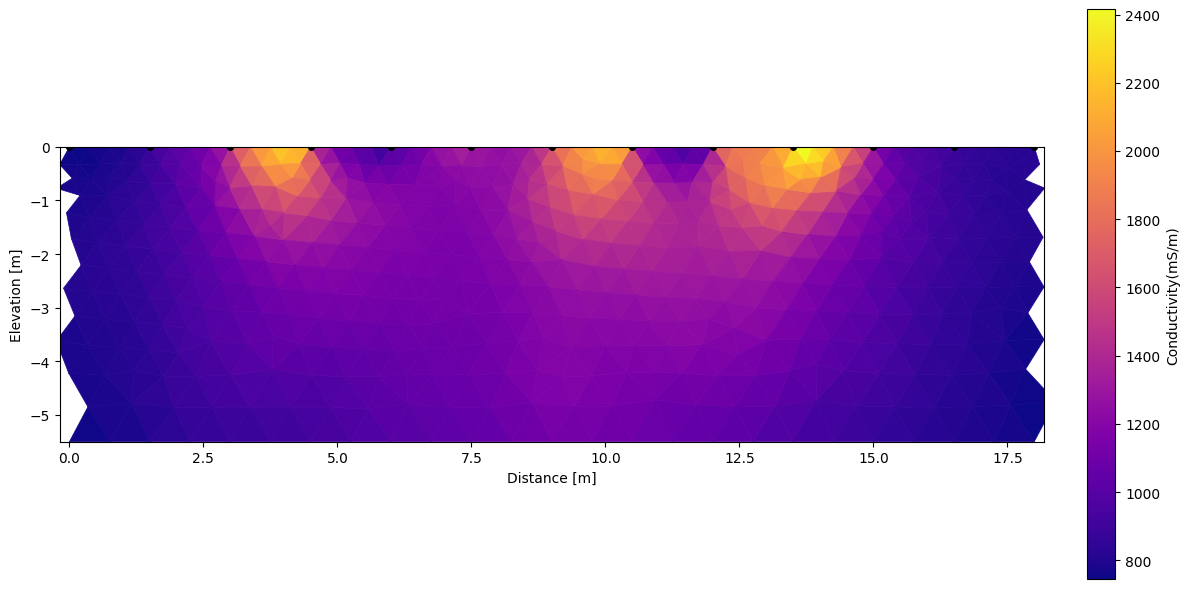

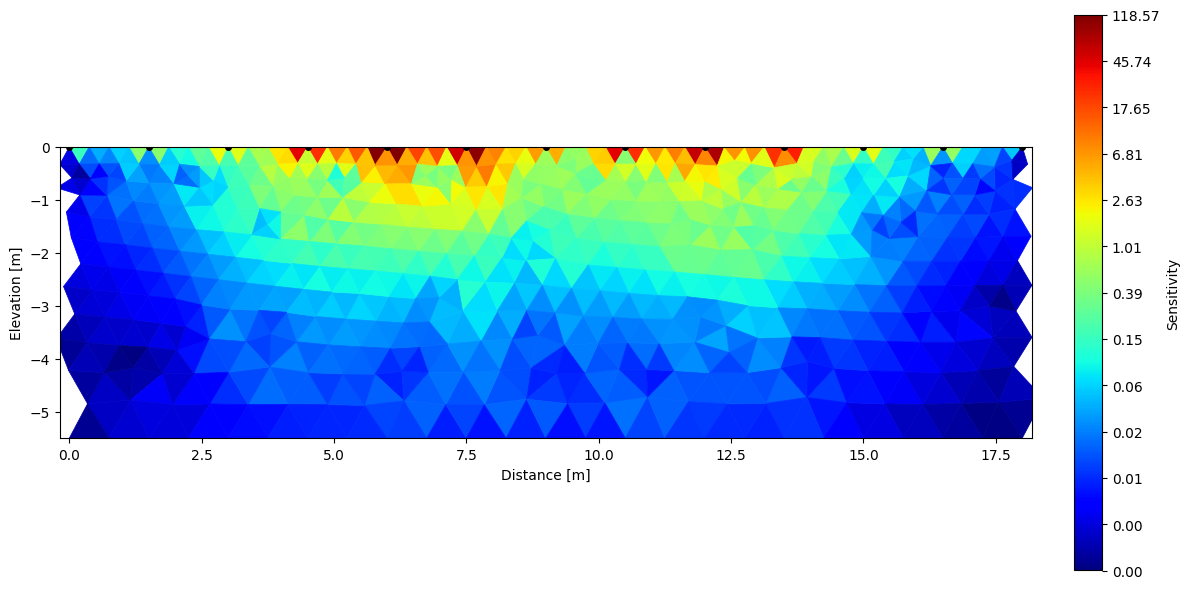

In [4]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig, ax2 = plt.subplots(1, 1, figsize=(12, 6))
k.showResults(ax=ax1, attr='Conductivity(mS/m)', color_map='plasma', sens=False)
k.showResults(ax=ax2, attr='Sensitivity(log10)', color_map='jet', sens=False)

In [5]:
rms_df = pd.DataFrame({'rms_ap_rm1': rms_list})
rms_df.to_csv(r'E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\rms_nap_rm0.csv', index = None)

In [6]:
averaged_list = []

for i, df in enumerate(results_list):  # now each element is a DataFrame
    df = df.copy()
    
    # Subset X ranges
    temp1 = df[(df['X'] > 8.8) & (df['X'] < 9.2)] #this is already based on the sensitivity so no need to change
    
    for temp, eX_val in zip([temp1], [7]):
        if temp.empty:
            continue
        
        # Create Z bins using 0.1 width (so ±0.05 will fall into same bin)
        temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
        
        # Average numeric columns within Z_bin
        df_avg = temp.groupby("Z_bin", as_index=False).mean(numeric_only=True)
        
        # Add eX, eY, and source info
        df_avg["eX"] = eX_val
        df_avg["eY"] = 12
        df_avg["source"] = i
        
        averaged_list.append(df_avg)

# Combine all
final_averaged_df = pd.concat(averaged_list, ignore_index=True)
final_averaged_df.head(40)

C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Z_bin"] = (temp["Z"] / 0.1).round() * 0.1
C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3183180183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Z_bin,param,elm_id,region,cellType,X,Y,Z,Resistivity(ohm.m),Resistivity(log10),Sensitivity(log10),Scaled_Sensitivity(log10),Conductivity(mS/m),eX,eY,source
0,-5.1,421.0,421.0,1.0,5.0,8.974720,0.0,-5.104717,1.163030,0.065590,-2.01911,-0.609140,859.823048,7,12,0
1,-4.7,581.0,581.0,1.0,5.0,8.945943,0.0,-4.716693,1.149350,0.060450,-2.05028,-0.607880,870.056989,7,12,0
2,-4.1,775.0,775.0,1.0,5.0,9.193910,0.0,-4.138573,1.116800,0.047980,-1.95914,-0.286580,895.415473,7,12,0
3,-4.0,365.0,365.0,1.0,5.0,8.895117,0.0,-3.989410,1.123280,0.050490,-1.65633,-0.020300,890.249982,7,12,0
4,-3.7,277.0,277.0,1.0,5.0,8.884423,0.0,-3.651687,1.110860,0.045660,-1.70538,-0.022360,900.203446,7,12,0
5,-3.5,368.0,368.0,1.0,5.0,9.163757,0.0,-3.477877,1.087010,0.036230,-1.48943,0.253430,919.954738,7,12,0
6,-3.2,279.0,279.0,1.0,5.0,9.138740,0.0,-3.163090,1.070410,0.029550,-1.53931,0.259860,934.221467,7,12,0
7,-3.0,216.0,216.0,1.0,5.0,8.858867,0.0,-3.017860,1.084180,0.035100,-1.33022,0.534150,922.356066,7,12,0
8,-2.7,177.0,177.0,1.0,5.0,8.836257,0.0,-2.719717,1.073850,0.030950,-1.37734,0.526340,931.228756,7,12,0
9,-2.6,412.0,412.0,1.0,5.0,9.053710,0.0,-2.555063,1.041250,0.017550,-1.19187,0.807820,960.384154,7,12,0


In [7]:
elecWB = r"E:\em2er\SD wERI Workflows and Data\Electrode mapping from Boat GPS\wERT_elec_combined.csv"
electrodes = pd.read_csv(elecWB)

In [8]:
# Assuming 'electrodes' DataFrame is already defined and has been filtered as per your previous request
# 'filtered' DataFrame is created by filtering 'electrodes'
# filtered = electrodes[electrodes['label'].astype(str).str.contains(r'( 5| 9)')].reset_index(drop=True)
filtered = electrodes[electrodes['label'].astype(str).str.contains(r'( 7)')].reset_index(drop=True)

# Create a mapping series to determine which row of 'filtered' to use
# The index will be 'source' and the values will be '0' for eX=6 and '1' for eX=12
# This assumes that for each source, eX=6 is always followed by eX=12
# The final index into 'filtered' is calculated as 2 * source + eX_index
final_averaged_df['eX_index'] = final_averaged_df['eX'].map({7: 0})
final_averaged_df['filtered_row_index'] = final_averaged_df['source'] + final_averaged_df['eX_index']

# Create dictionaries for fast lookup
x_map = filtered['x'].to_dict()
y_map = filtered['y'].to_dict()

# Map the values to new columns
final_averaged_df['x'] = final_averaged_df['filtered_row_index'].map(x_map)
final_averaged_df['y'] = final_averaged_df['filtered_row_index'].map(y_map)

C:\Users\henry\AppData\Local\Temp\ipykernel_11200\3790354066.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered = electrodes[electrodes['label'].astype(str).str.contains(r'( 7)')].reset_index(drop=True)


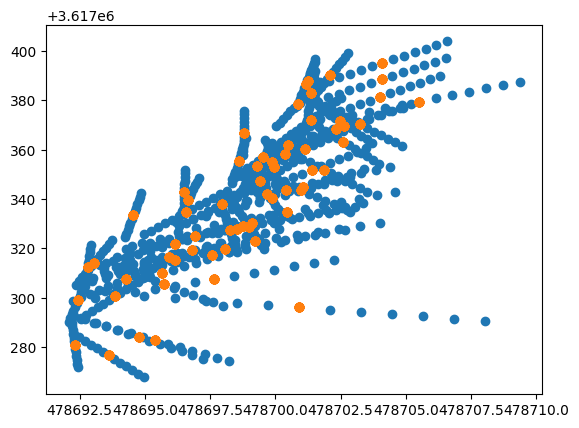

In [9]:
plt.scatter(electrodes['x'], electrodes['y'])
plt.scatter(final_averaged_df['x'], final_averaged_df['y'])

In [10]:
final_averaged_df.to_csv(r"E:\em2er\SD wERI Workflows and Data\wERI Inversion - Raw (reg_mode=0)\ERT_not_informed.csv", index=None)

In [11]:
final_averaged_df

,Z_bin,param,elm_id,region,cellType,X,Y,Z,Resistivity(ohm.m),Resistivity(log10),Sensitivity(log10),Scaled_Sensitivity(log10),Conductivity(mS/m),eX,eY,source,eX_index,filtered_row_index,x,y
0,-5.1,421.0,421.0,1.0,5.0,8.974720,0.0,-5.104717,1.163030,0.06559,-2.019110,-0.609140,859.823048,7,12,0,0,0,478704.101165,3.617395e+06
1,-4.7,581.0,581.0,1.0,5.0,8.945943,0.0,-4.716693,1.149350,0.06045,-2.050280,-0.607880,870.056989,7,12,0,0,0,478704.101165,3.617395e+06
2,-4.1,775.0,775.0,1.0,5.0,9.193910,0.0,-4.138573,1.116800,0.04798,-1.959140,-0.286580,895.415473,7,12,0,0,0,478704.101165,3.617395e+06
3,-4.0,365.0,365.0,1.0,5.0,8.895117,0.0,-3.989410,1.123280,0.05049,-1.656330,-0.020300,890.249982,7,12,0,0,0,478704.101165,3.617395e+06
4,-3.7,277.0,277.0,1.0,5.0,8.884423,0.0,-3.651687,1.110860,0.04566,-1.705380,-0.022360,900.203446,7,12,0,0,0,478704.101165,3.617395e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,-0.9,398.5,398.5,1.0,5.0,8.928375,0.0,-0.903167,0.649625,-0.18757,-0.341185,1.819565,1541.013318,7,12,63,0,63,478693.603452,3.617277e+06
1342,-0.6,41.0,41.0,1.0,5.0,9.134827,0.0,-0.620073,0.602930,-0.21974,-0.234860,1.902860,1658.567330,7,12,63,0,63,478693.603452,3.617277e+06
1343,-0.5,176.0,176.0,1.0,5.0,8.970590,0.0,-0.459793,0.626930,-0.20278,-0.270490,2.002270,1595.074410,7,12,63,0,63,478693.603452,3.617277e+06
1344,-0.2,611.0,611.0,1.0,5.0,9.004037,0.0,-0.226947,0.607420,-0.21651,-0.195360,2.140450,1646.307333,7,12,63,0,63,478693.603452,3.617277e+06
